In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, concatenate, BatchNormalization, Dropout, Activation
from keras.models import Model
from keras.datasets import cifar10
from keras.optimizers import Adam, SGD
from keras.regularizers import l1,l2
from keras.utils import plot_model
from skimage.color import rgb2gray, gray2rgb, rgb2hsv, hsv2rgb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Load and Preprocess the dataset

In [0]:
# !pip install h5py pyyaml

In [2]:
# load the dataset
(xtrain, _), (xtest, _) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

xtrain_red = xtrain[:,:,:,0]
xtrain_green = xtrain[:,:,:,1] 
xtrain_blue = xtrain[:,:,:,2]

xtest_red = xtest[:,:,:,0]
xtest_green = xtest[:,:,:,1] 
xtest_blue = xtest[:,:,:,2]

xtrain_red = xtrain_red.reshape(len(xtrain_red), np.prod(xtrain_red.shape[1:]))
xtrain_green = xtrain_green.reshape(len(xtrain_green), np.prod(xtrain_green.shape[1:]))
xtrain_blue = xtrain_blue.reshape(len(xtrain_blue), np.prod(xtrain_blue.shape[1:]))

xtest_red = xtest_red.reshape(len(xtest_red), np.prod(xtest_red.shape[1:]))
xtest_green = xtest_green.reshape(len(xtest_green), np.prod(xtest_green.shape[1:]))
xtest_blue = xtest_blue.reshape(len(xtest_blue), np.prod(xtest_blue.shape[1:]))

# Define Model

In [0]:
input_layer = xtrain_red.shape[1]
hid_layer1 = 576
hid_layer2 = 256
hid_layer3 = 64
hid_layer4 = 10
hid_layer5 = hid_layer3
hid_layer6 = hid_layer2
hid_layer7 = hid_layer1
output_layer = input_layer
print(xtrain_red.shape)
print(xtest_red.shape)

(50000, 1024)
(10000, 1024)


In [0]:
input_img_red = Input(shape=(input_layer,))
input_img_green = Input(shape=(input_layer,))
input_img_blue = Input(shape=(input_layer,))

W0817 15:15:45.544038 140338359695232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 15:15:45.584907 140338359695232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [0]:
# network architecture
# vanilla autoencoder with fully-connected layer
# RED
x = Dense(units = hid_layer1, activation='relu')(input_img_red)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer2, activation='relu')(x)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer3, activation='relu')(x)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)

# GREEN
y = Dense(units = hid_layer1, activation='relu')(input_img_green)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer2, activation='relu')(y)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer3, activation='relu')(y)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)

# BLUE
z = Dense(units = hid_layer1, activation='relu')(input_img_blue)
# z = Dropout(rate = 0.5)(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer2, activation='relu')(z)
# z = Dropout(rate = 0.5)(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer3, activation='relu')(z)
# z = Dropout(rate = 0.5)(z)
# z = BatchNormalization()(z)

bottleneck = concatenate([x, y, z])
encoded = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-12))(bottleneck)

# RED
x = Dense(units = hid_layer5, activation = 'relu')(encoded)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer6, activation='relu')(x)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer7, activation='relu')(x)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)

# GREEN
y = Dense(units = hid_layer5, activation = 'relu')(encoded)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer6, activation='relu')(y)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer7, activation='relu')(y)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)

# BLUE
z = Dense(units = hid_layer5, activation = 'relu')(encoded)
# z = Dropout(rate = 0.6)(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer6, activation='relu')(z)
# z = Dropout(rate = 0.6)(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer7, activation='relu')(z)
# z = Dropout(rate = 0.6)(z)
# z = BatchNormalization()(z)

decoded_red = Dense(units = output_layer, activation='sigmoid')(x)
decoded_green = Dense(units = output_layer, activation='sigmoid')(y)
decoded_blue = Dense(units = output_layer, activation='sigmoid')(z)

autoencoder = Model([input_img_red, input_img_green, input_img_blue], [decoded_red, decoded_green, decoded_blue])
encoder = Model([input_img_red, input_img_green, input_img_blue], encoded)

autoencoder.compile(optimizer= Adam(lr = 1e-5), loss='mean_absolute_error')

W0817 15:15:45.655761 140338359695232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 15:15:46.018889 140338359695232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
plot_model(autoencoder, to_file='model.png')

In [0]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1024)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 1024)         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 576)          590400      input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

# Train Model

In [0]:
# train the model
history = autoencoder.fit([xtrain_red, xtrain_green, xtrain_blue], [xtrain_red, xtrain_green, xtrain_blue],
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=([xtest_red, xtest_green, xtest_blue], [xtest_red, xtest_green, xtest_blue]))

W0817 15:15:46.921277 140338359695232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0817 15:15:47.702665 140338359695232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 299us/step - loss: 0.6123 - dense_20_loss: 0.1997 - dense_21_loss: 0.1939 - dense_22_loss: 0.2181 - val_loss: 0.5717 - val_dense_20_loss: 0.1893 - val_dense_21_loss: 0.1822 - val_dense_22_loss: 0.1996
Epoch 2/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.5197 - dense_20_loss: 0.1760 - dense_21_loss: 0.1694 - dense_22_loss: 0.1738 - val_loss: 0.4847 - val_dense_20_loss: 0.1657 - val_dense_21_loss: 0.1601 - val_dense_22_loss: 0.1583
Epoch 3/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.4741 - dense_20_loss: 0.1630 - dense_21_loss: 0.1572 - dense_22_loss: 0.1533 - val_loss: 0.4619 - val_dense_20_loss: 0.1591 - val_dense_21_loss: 0.1533 - val_dense_22_loss: 0.1490
Epoch 4/100
50000/50000 [==============================] - 9s 185us/step - loss: 0.4534 - dense_20_loss: 0.1568 - dense_21_loss: 0.1506 - dense_22_loss: 0.1455 

dict_keys(['val_loss', 'val_dense_20_loss', 'val_dense_21_loss', 'val_dense_22_loss', 'loss', 'dense_20_loss', 'dense_21_loss', 'dense_22_loss'])


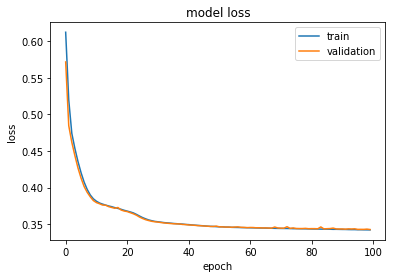

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [0]:
autoencoder.save('autoencoder_sharedLatent.h5')

# (Optional) This Section load a pretrained model

In [4]:
# Optional: Load pretrained model
from keras.models import load_model
autoencoder = load_model('autoencoder_sharedLatent.h5')
encoder = Model(inputs = [autoencoder.input[0], autoencoder.input[1], autoencoder.input[2]],outputs =  autoencoder.get_layer(index = 13).output)

# Reconstruction Results

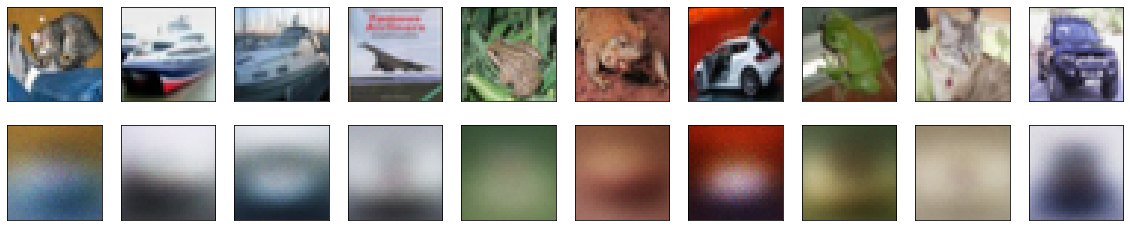

In [5]:
# show the result at the decoder output
decoded_imgs_red, decoded_imgs_green, decoded_imgs_blue = autoencoder.predict([xtest_red, xtest_green, xtest_blue])

counter = 0
n = 10
test_imgs = np.zeros((32,32,3))
dec_imgs = np.zeros((32,32,3))

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    test_imgs[:,:,0] = xtest_red[counter + i].reshape(32, 32)
    test_imgs[:,:,1] = xtest_green[counter + i].reshape(32, 32)
    test_imgs[:,:,2] = xtest_blue[counter + i].reshape(32, 32)

    plt.imshow(test_imgs)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    dec_imgs[:,:,0] = decoded_imgs_red[counter + i].reshape(32, 32)
    dec_imgs[:,:,1] = decoded_imgs_green[counter + i].reshape(32, 32)
    dec_imgs[:,:,2] = decoded_imgs_blue[counter + i].reshape(32, 32)

    plt.imshow(dec_imgs)
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

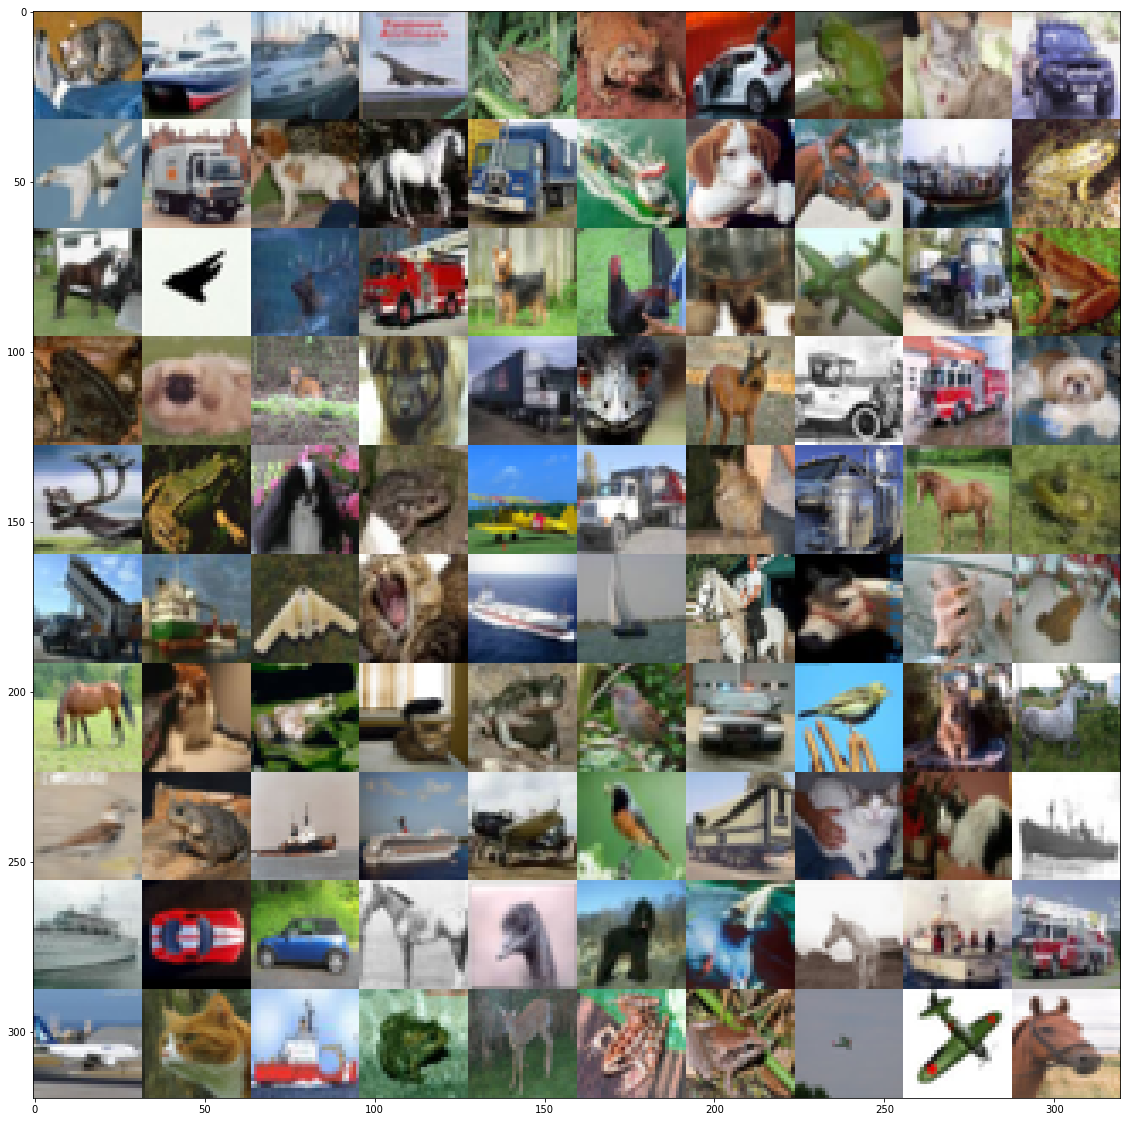

In [0]:
# display test images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
test_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      test_imgs[:,:,0] = xtest_red[counter].reshape(32, 32)
      test_imgs[:,:,1] = xtest_green[counter].reshape(32, 32)
      test_imgs[:,:,2] = xtest_blue[counter].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = test_imgs
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

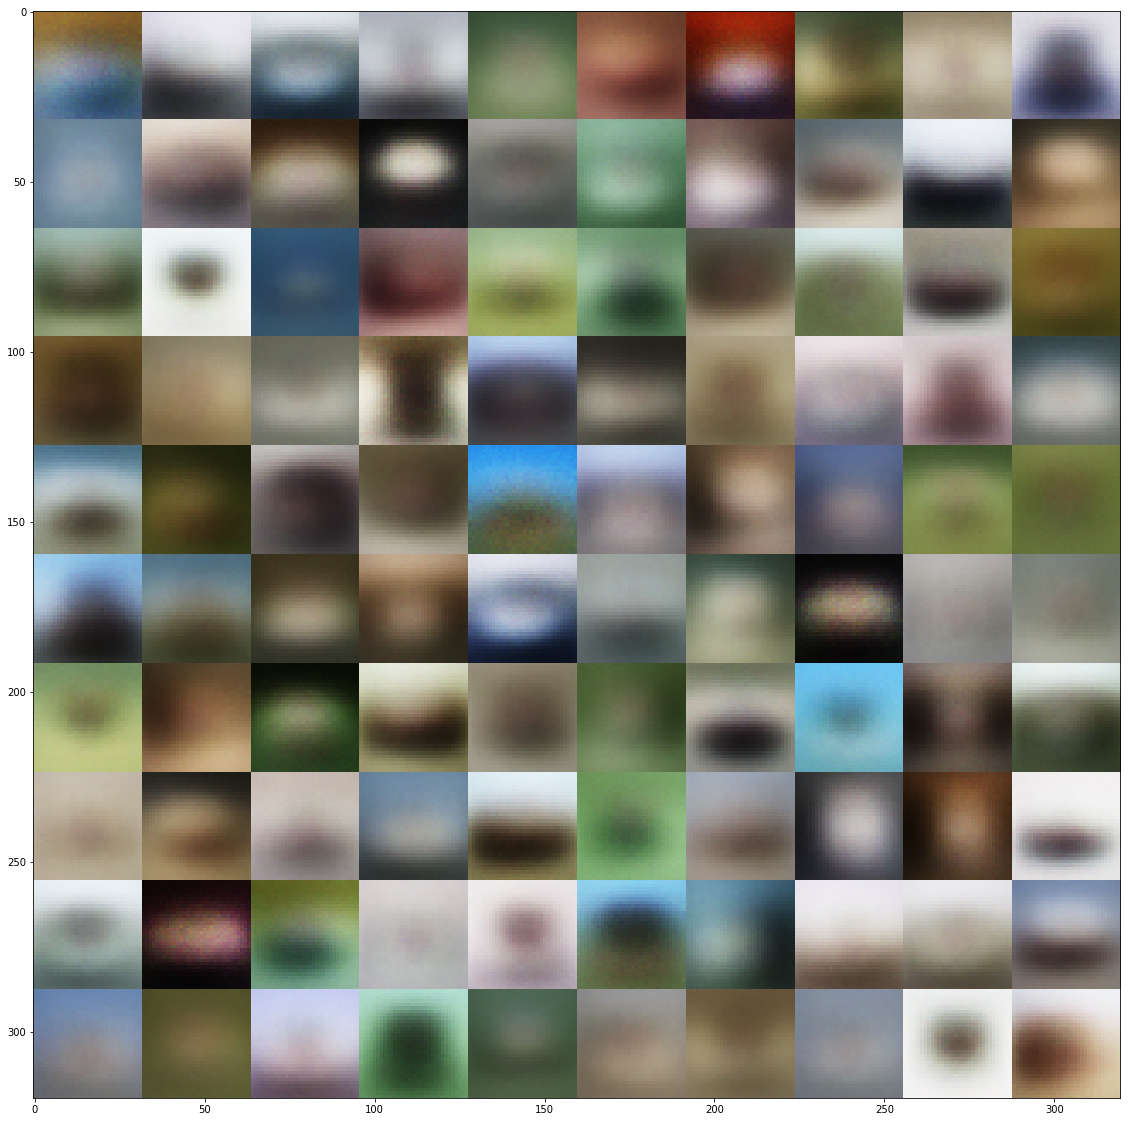

In [6]:
# display reconstructed images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
dec_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      dec_imgs[:,:,0] = decoded_imgs_red[counter].reshape(32, 32)
      dec_imgs[:,:,1] = decoded_imgs_green[counter].reshape(32, 32)
      dec_imgs[:,:,2] = decoded_imgs_blue[counter].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = dec_imgs
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

(array([416., 282., 142., 105.,  41.,  11.,  13.,   4.,   3.,   7.]),
 array([8.0466270e-06, 6.3729122e-02, 1.2745020e-01, 1.9117129e-01,
        2.5489235e-01, 3.1861344e-01, 3.8233453e-01, 4.4605559e-01,
        5.0977665e-01, 5.7349777e-01, 6.3721883e-01], dtype=float32),
 <a list of 10 Patch objects>)

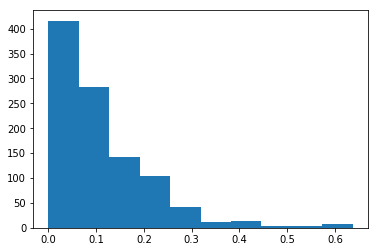

In [0]:
err_red = np.sqrt(np.square(xtest_red[0] - decoded_imgs_red[0]))
plt.hist(err_red)

(array([420., 230., 181.,  97.,  38.,  29.,   7.,  12.,   6.,   4.]),
 array([7.7903271e-05, 5.0086886e-02, 1.0009587e-01, 1.5010485e-01,
        2.0011383e-01, 2.5012282e-01, 3.0013180e-01, 3.5014078e-01,
        4.0014976e-01, 4.5015875e-01, 5.0016773e-01], dtype=float32),
 <a list of 10 Patch objects>)

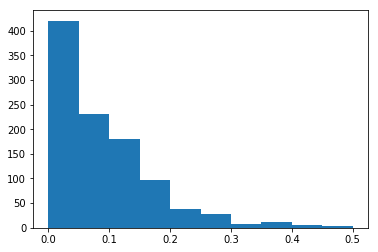

In [0]:
err_green = np.sqrt(np.square(xtest_green[0] - decoded_imgs_green[0]))
plt.hist(err_green)

(array([416., 282., 142., 105.,  41.,  11.,  13.,   4.,   3.,   7.]),
 array([8.0466270e-06, 6.3729122e-02, 1.2745020e-01, 1.9117129e-01,
        2.5489235e-01, 3.1861344e-01, 3.8233453e-01, 4.4605559e-01,
        5.0977665e-01, 5.7349777e-01, 6.3721883e-01], dtype=float32),
 <a list of 10 Patch objects>)

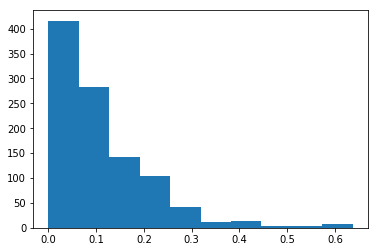

In [0]:
err_blue = np.sqrt(np.square(xtest_blue[0] - decoded_imgs_blue[0]))
plt.hist(err_red)

# Experiment: Varying the Bottleneck Parameter

## **1) Create a Decoder Model**

In [0]:
from keras.models import load_model
test_model = load_model('autoencoder_sharedLatent.h5')

encoding = Input(shape = (hid_layer4,))
# RED
x = Dense(units = hid_layer5, activation = 'relu')(encoding)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer6, activation='relu')(x)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer7, activation='relu')(x)
# x = Dropout(rate = 0.5)(x)
# x = BatchNormalization()(x)

# GREEN
y = Dense(units = hid_layer5, activation = 'relu')(encoding)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer6, activation='relu')(y)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)
y = Dense(units = hid_layer7, activation='relu')(y)
# y = Dropout(rate = 0.5)(y)
# y = BatchNormalization()(y)

# BLUE
z = Dense(units = hid_layer5, activation = 'relu')(encoding)
# z = Dropout(rate = 0.6)(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer6, activation='relu')(z)
# z = Dropout(rate = 0.6)(z)
# z = BatchNormalization()(z)
z = Dense(units = hid_layer7, activation='relu')(z)
# z = Dropout(rate = 0.6)(z)
# z = BatchNormalization()(z)

decoded_red = Dense(units = output_layer, activation='sigmoid')(x)
decoded_green = Dense(units = output_layer, activation='sigmoid')(y)
decoded_blue = Dense(units = output_layer, activation='sigmoid')(z)

newModel = Model(encoding, [decoded_red, decoded_green, decoded_blue])
newModel.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           704         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 64)           704         input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 64)           704         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (D

## **2) Assign decoder weights**

In [0]:
newModel.layers[1].set_weights(test_model.layers[14].get_weights())
newModel.layers[2].set_weights(test_model.layers[15].get_weights())
newModel.layers[3].set_weights(test_model.layers[16].get_weights())
newModel.layers[4].set_weights(test_model.layers[17].get_weights())
newModel.layers[5].set_weights(test_model.layers[18].get_weights())
newModel.layers[6].set_weights(test_model.layers[19].get_weights())
newModel.layers[7].set_weights(test_model.layers[20].get_weights())
newModel.layers[8].set_weights(test_model.layers[21].get_weights())
newModel.layers[9].set_weights(test_model.layers[22].get_weights())
newModel.layers[10].set_weights(test_model.layers[23].get_weights())
newModel.layers[11].set_weights(test_model.layers[24].get_weights())
newModel.layers[12].set_weights(test_model.layers[25].get_weights())

## **3) Display the bottleneck layer**

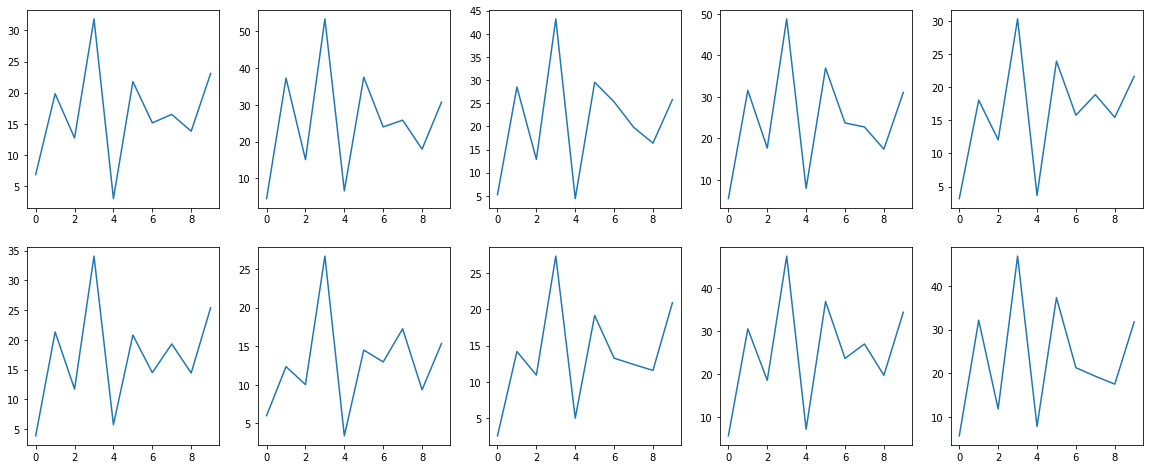

In [0]:
# show the representation at the bottleneck
encoded_imgs = encoder.predict([xtest_red, xtest_green, xtest_blue])
counter = 0
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()

**4) Vary the bottleneck value**

In [0]:
newbot = np.zeros(encoded_imgs.shape)

# Comment the node to switch off (0, 50, 6, 8) (inconsistent node: 0, 4, 8)
# newbot[:,0] = encoded_imgs[:,0] # Blue # Gray # Blue # Blue
# newbot[:,1] = encoded_imgs[:,1] # Cyan # Cyan # Cyan # Cyan
# newbot[:,2] = encoded_imgs[:,2] # Green # Green # Green # Green
# newbot[:,3] = encoded_imgs[:,3] # Black # Black # Black # Black
# newbot[:,4] = encoded_imgs[:,4] # Gray # Blue # Gray # Blue
# newbot[:,5] = encoded_imgs[:,5] # Cyan # Cyan # Cyan # Cyan
# newbot[:,6] = encoded_imgs[:,6] # Green # Green # Green # Green
# newbot[:,7] = encoded_imgs[:,7] # Purple # Purple # Purple # Purple
# newbot[:,8] = encoded_imgs[:,8] # Cyan # Black # Cyan # Black
newbot[:,9] = encoded_imgs[:,9] # Orange # Orange # Orange # Orange
print(newbot[0])

[ 0.         0.         0.         0.         0.         0.
  0.         0.         0.        23.0776062]


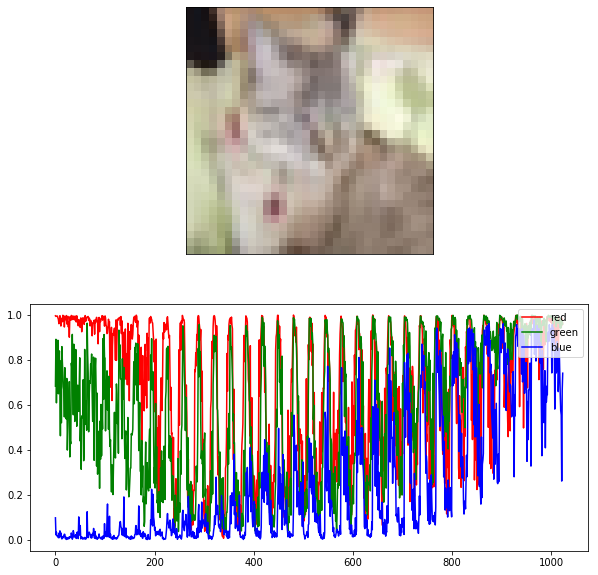

In [0]:
# show the result at the decoder output
decoded_imgs_red, decoded_imgs_green, decoded_imgs_blue = newModel.predict([newbot])

counter = 8
n = 1
test_imgs = np.zeros((32,32,3))
dec_imgs = np.zeros((32,32,3))

x = np.arange(1024)

plt.figure(figsize=(10, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    test_imgs[:,:,0] = xtest_red[counter + i].reshape(32, 32)
    test_imgs[:,:,1] = xtest_green[counter + i].reshape(32, 32)
    test_imgs[:,:,2] = xtest_blue[counter + i].reshape(32, 32)

    plt.imshow(test_imgs)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    dec_imgs[:,:,0] = decoded_imgs_red[counter + i].reshape(32, 32)
    dec_imgs[:,:,1] = decoded_imgs_green[counter + i].reshape(32, 32)
    dec_imgs[:,:,2] = decoded_imgs_blue[counter + i].reshape(32, 32)
    
    plt.plot(x, decoded_imgs_red[counter + i], 'r', x, decoded_imgs_green[counter + i], 'g', x, decoded_imgs_blue[counter + i], 'b')
    plt.legend(['red','green','blue'], loc = 'upper right')
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    
    # ax = plt.subplot(3,n, i + n + n + 1)
    # plt.imshow(dec_imgs)
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
plt.show()

## 5) Define the node representation in the color it represents

In [0]:
import math

def rgb2hsl(red,green,blue):
  """
  Convert color from RGB to HSL colorspace
  Input: RGB [0..1]
  Output: HSL [0..1]
  Ref: https://en.wikipedia.org/wiki/HSL_and_HSV
  
  """
  # Normalize
  red = red
  green = green
  blue = blue
  
  high = max(red,green,blue)
  low = min(red,green,blue)
  
  luminance = (high + low)/2.
  
  if (high == low):
    hue = saturation = 0 # achromatic
  else:
    d = high - low
    saturation = d / (2 - high - low) if luminance > 0.5 else d / (high + low)
    hue = {
            red: (green - blue) / d + (6 if green < blue else 0),
            green: (blue - red) / d + 2,
            blue: (red - green) / d + 4,      
    }[high]
    hue /= 6
    
  return hue, saturation, luminance

In [0]:
def color_define(hue, saturation, luminance):

  if (luminance < 0.15):
    color = 'Black'
  elif (luminance > 0.9):
    color = 'White'
  else:
    if (saturation < 0.15):
      color = 'Gray'
    else:
      if  (hue >= 0 and hue < 1/12.):
        color = 'Red'
      elif (hue >= 1/12. and hue < 1/6.):
        color = 'Orange'
      elif (hue >= 1/6. and hue < 1/3.):
        color = 'Yellow'
      elif (hue >= 1/3. and hue < 1/2.):
        color = 'Green'
      elif (hue >= 1/2. and hue < 2/3.):
        color = 'Cyan'
      elif (hue >= 2/3. and hue < 5/6.):
        color = 'Blue'
      elif (hue >= 5/6. and hue < 1):
        color = 'Purple'
      
  return color

In [0]:
# Find the average color (rgb) in the image
r = decoded_imgs_red[counter].mean()
g = decoded_imgs_green[counter].mean()
b = decoded_imgs_blue[counter].mean()

# Convert to hsl colorspace
h, s, l = rgb2hsl(r,g,b)
color = color_define(h,s,l)
print(r,g,b)
print(h,s,l)
print('color: ',color)

0.6859036 0.59830844 0.2588144
0.13248366117477417 0.45208117 0.4723590016365051
color:  Orange
